<a href="https://colab.research.google.com/github/lzhou56/COVID-19/blob/master/Project02_V20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project-2**

_Get the country-specific covid case data from here. (Note pandas allows you to load a csv file from a URL. Make sure to use the "raw" link to the file on github.)_

    1) Pick four countries. Show the time series plot of new cases per day for the four countries from the day of the first nonzero case day. (Note we do not want to show cumulative cases by day.)
    2) Plot a smoothed version of the country specific data using a lowess smoother (see the hint if you need to).
    3) Let e be the difference between your observed case counts and the smoothed version. Plot e over time. (e is called the "residual").
    4) From the same website, download the daily death data. Calculate the overall case fatality rate = total deaths / total cases.
    5) For your four countries, plot the estimate of the case fatality rate at that day in the outbreak, starting from the day of the first case. That is, for day d plot the number of deaths divided by the number of cases occuring up to day d.
    6) Create your report in a colab or ipython document and check the document into the github classroom repository for project 2. (Make sure to actually run the document so that the figures and results are present.)


In [1]:
# Import modules
import pandas as pd
import numpy as np
# from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import timedelta, date
import matplotlib.dates as mdates

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Set up parameters
url_case = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_death = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

#country = ["Japan"]
country = ["Japan", "Italy", "Greece", "Egypt"] # Will expand into 4

In [3]:
# Load data
case = pd.read_csv(url_case)
death = pd.read_csv(url_death)

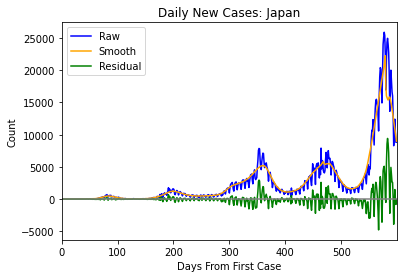

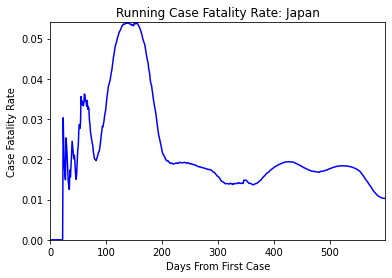

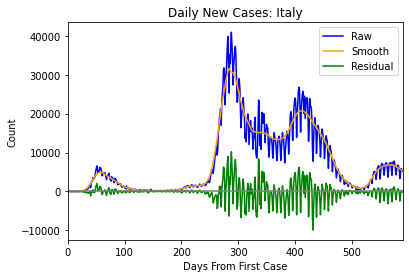

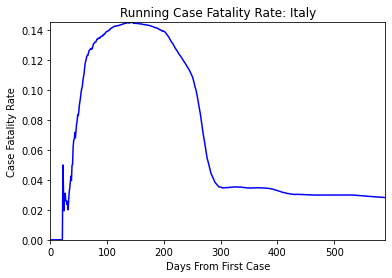

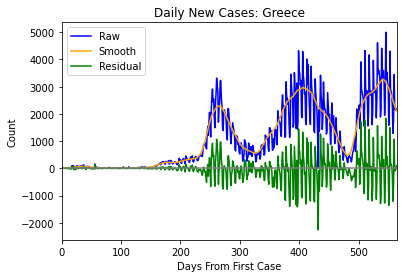

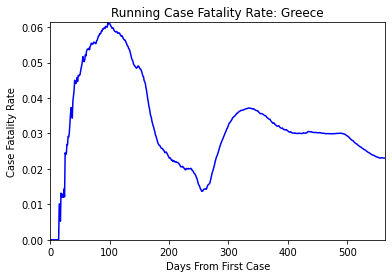

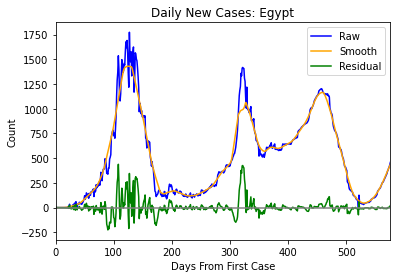

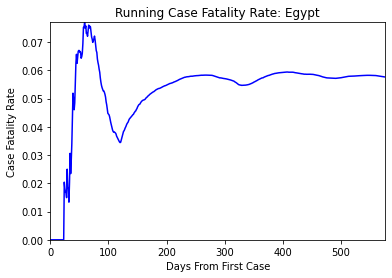

In [4]:
# Part 1, 2, 3, and 5: Daily new cases for selected countries

for c in country:
  x = case[case['Country/Region'] == c].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
  
  '''
  # Get dates
  x_date = x.columns.values
  x_date = np.squeeze(x_date)
  x_date = pd.to_datetime(x_date)
  '''

  # Extract cumaltive case
  x_count = np.asarray(x)
  x_count = np.squeeze(x_count)

  # Detect date of first case
  x_index = np.where(x_count > 0)
  x_start = np.min(x_index)

  # Extract data starting from first non-zero case
  x_count = x_count[x_start:] # Extract values from index1 to index2 (: = 'to'). When the end index is missing from ':', it means 'all the way to the end'
  # x_date = x_date[x_start:]

  # Get daily increases
  x2 = x_count[1:]
  x1 = x_count[0:(x_count.size-1)]
  x_net = x2 - x1
  x_net = np.hstack((x2[0],x_net)) # np.hstack horizontally concatenates the first with the second argument. vstack does it vertically. Needs 2 parentheses
  x_day = np.arange(1,len(x_net)+1)
  # Smoothing
  x_smooth = sm.nonparametric.lowess(x_net, x_day, frac=.05,return_sorted=False)
 
  # Difference
  e = x_net - x_smooth
  
  
  # Plotting
  fig = plt.figure()
  plt.plot(x_day,x_net, color = 'blue', label = 'Raw')
  plt.plot(x_day, x_smooth, color = 'orange', label = 'Smooth')
  plt.plot(x_day, e, color = 'green', label = 'Residual')
  plt.title('Daily New Cases: ' + c )
  plt.ylabel('Count')
  plt.xlabel('Days From First Case')
  plt.legend()

  ax=plt.gca() #get current graph handle (makes an object of the current axis)
  ax.axhline(y=0, color='gray') # add a horizontal line at y=0
  #ax.axvline(x=0, color='k') # vertical line
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y')) #change format to mm/dd/yy
  #fig.autofmt_xdate() #rotate X ticks. see https://stackoverflow.com/questions/29968654/format-of-datetime-in-pyplot-axis
  plt.xlim([0, np.max(x_day)])
  
  # Deaths
  y = death[death['Country/Region'] == c].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)

  # Extract cumaltive death
  y_count = np.asarray(y)
  y_count = np.squeeze(y_count)


  # Extract data starting from first non-zero case
  y_count = y_count[x_start:] # Extract values from index1 to index2 (: = 'to'). When the end index is missing from ':', it means 'all the way to the end'

  # Computer running CFR
  cfr = y_count/x_count

  # Plotting
  fig = plt.figure()
  plt.plot(x_day,cfr, color = 'blue', label = 'Raw')
  plt.title('Running Case Fatality Rate: ' + c )
  plt.ylabel('Case Fatality Rate')
  plt.xlabel('Days From First Case')
  # plt.legend()
  plt.xlim([0, np.max(x_day)])
  plt.ylim([0, max(cfr)])

  #print(x_count)

In [5]:
# Part 4

death_global = death.iloc[:, -1] # Last row of dataset
death_global = death_global.sum() # Sums the values in the last column

case_global = case.iloc[:, -1] 
case_global = case_global.sum()

cfr_global = death_global/case_global
print('--- Global COVID-19 Summary ---')
print('Total Case = ' + str(case_global))
print('Total Deaths = ' + str(death_global))
print('Case Fatality Rate = ' + str(cfr_global))
print('--- End ---')

--- Global COVID-19 Summary ---
Total Case = 224269884
Total Deaths = 4624864
Case Fatality Rate = 0.020621868248703424
--- End ---
